In [53]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


In [54]:
print(tf.version)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


<module 'tensorflow._api.v2.version' from 'C:\\Users\\Miguel\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
Num GPUs Available:  1


In [55]:
#Cargamos el dataset
import pathlib
data_dir = r"C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\ICHBI\DATASETS\CICLOS_BUTTER\Balanceado_4clases\dataset"
data_dir = pathlib.Path(data_dir)


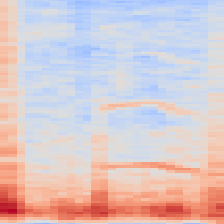

In [56]:
#obtenemos un ejemplo
crackles = list(data_dir.glob('both/*'))
PIL.Image.open(str(crackles[0]))


In [57]:
altura_imagen, anchura_imagen = 224, 224
batch_size = 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen, anchura_imagen),
    batch_size=batch_size)


Found 2000 files belonging to 4 classes.
Using 1600 files for training.


In [58]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen, anchura_imagen),
    batch_size=batch_size)


Found 2000 files belonging to 4 classes.
Using 400 files for validation.


In [59]:
class_names = train_ds.class_names
print(class_names)


['both', 'crackles', 'empty', 'wheezes']


In [60]:
mobile_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV3Small(include_top=False, input_shape=(
    224, 224, 3), pooling='avg', classes=4, weights='imagenet')

for layer in mobile_model.layers:
    layer.trainable = False

mobile_model.add(pretrained_model)

#############Base################
mobile_model.add(Flatten())
mobile_model.add(Dense(1024, activation='relu'))
#################################

#############2D2Drop##############
#mobile_model.add(Flatten())
#mobile_model.add(Dense(128, activation='relu'))
#mobile_model.add(Dropout(0.5))
#mobile_model.add(Dense(128, activation='relu'))
#mobile_model.add(Dropout(0.5))
###################################

##########Progresivo#############
#mobile_model.add(Dense(2048, activation='relu'))
#mobile_model.add(Dropout(0.5))
#mobile_model.add(Dense(1024, activation='relu'))
#mobile_model.add(Dropout(0.25))
#mobile_model.add(Dense(512, activation='relu'))
#mobile_model.add(Dropout(0.1))
##################################


mobile_model.add(Dense(4, activation='softmax'))


In [61]:
mobile_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1024)              1529968   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 4100      
Total params: 2,583,668
Trainable params: 2,571,556
Non-trainable params: 12,112
_________________________________________________________________


In [62]:
mobile_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
epochs = 100
history = mobile_model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/100
25/25 [==============================] - 6s 145ms/step - loss: 1.3151 - accuracy: 0.4206 - val_loss: 1.6276 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 3s 125ms/step - loss: 0.9006 - accuracy: 0.6162 - val_loss: 1.8521 - val_accuracy: 0.3375
Epoch 3/100
25/25 [==============================] - 3s 126ms/step - loss: 0.5338 - accuracy: 0.7819 - val_loss: 2.2778 - val_accuracy: 0.3450
Epoch 4/100
25/25 [==============================] - 3s 125ms/step - loss: 0.3522 - accuracy: 0.8675 - val_loss: 2.7911 - val_accuracy: 0.3200
Epoch 5/100
25/25 [==============================] - 3s 126ms/step - loss: 0.3138 - accuracy: 0.8825 - val_loss: 2.8785 - val_accuracy: 0.3325
Epoch 6/100
25/25 [==============================] - 3s 124ms/step - loss: 0.2298 - accuracy: 0.9062 - val_loss: 3.8334 - val_accuracy: 0.3275
Epoch 7/100
25/25 [==============================] - 3s 125ms/step - loss: 0.1705 - accuracy: 0.9325 - val_loss: 2.7876 - val_accuracy: 0.3975

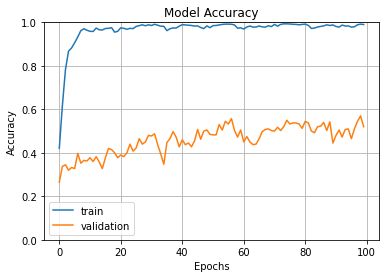

In [64]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.0, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


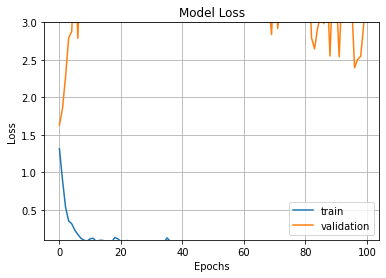

In [65]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0.1, ymax=3)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [66]:
mobile_model.save(
    r'C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\Codigo\ModelosEntrenados\MobileNetV3_Balanced4_Butter_Base_80_20.h5')
